In [30]:
import turicreate as tc
import matplotlib.pyplot as plt
import numpy as np

# Ladataan dataset

In [31]:
image_train = tc.SFrame('image_train_data')
image_test = tc.SFrame('image_test_data')

In [32]:
image_train.head()

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


# Nearest-neighborm mallin tekeminen

In [33]:
knn_model = tc.nearest_neighbors.create(image_train, features=['deep_features'], label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

# Käytetään mallia samallaisten kuvien etsimiseen

In [34]:
cat = image_train[18:19]

In [35]:
cat['label'].show

<bound method SArray.show of dtype: str
Rows: 1
['cat']>

In [36]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 6.298ms      |

| Done         |         | 100         | 37.407ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,384,0.0,1
0,6910,36.94031379506751,2
0,39777,38.46348889747021,3
0,36870,39.75596231189652,4
0,41734,39.786601414815024,5


In [37]:
def get_images_from_ids(query_result):
    return image_train.filter_by(query_result['reference_label'], 'id')

In [38]:
cat_neighbors = get_images_from_ids(knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 8.147ms      |

| Done         |         | 100         | 30.632ms     |

+--------------+---------+-------------+--------------+

In [39]:
cat_neighbors['image'].explore

<bound method SArray.explore of dtype: Image
Rows: 5
['Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32']>

In [40]:
car = image_train[8:9]
cat['image'].explore

<bound method SArray.explore of dtype: Image
Rows: 1
['Height: 32 Width: 32']>

In [41]:
get_images_from_ids(knn_model.query(car))['image']

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 7.884ms      |

| Done         |         | 100         | 32.57ms      |

+--------------+---------+-------------+--------------+

dtype: Image
Rows: 5
['Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32']

# Lambda nearest-neighbor

In [42]:
show_neighbors = lambda i: get_images_from_ids(knn_model.query(image_train[i:i+1]))['image']

In [43]:
show_neighbors(8)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 7.804ms      |

| Done         |         | 100         | 29.044ms     |

+--------------+---------+-------------+--------------+

dtype: Image
Rows: 5
['Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32']

In [44]:
show_neighbors(26)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 7.133ms      |

| Done         |         | 100         | 31.491ms     |

+--------------+---------+-------------+--------------+

dtype: Image
Rows: 5
['Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32']

In [45]:
show_neighbors(1222)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 5.466ms      |

| Done         |         | 100         | 28.191ms     |

+--------------+---------+-------------+--------------+

dtype: Image
Rows: 5
['Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32']

In [46]:
show_neighbors(2000)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 8.728ms      |

| Done         |         | 100         | 32.717ms     |

+--------------+---------+-------------+--------------+

dtype: Image
Rows: 5
['Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32', 'Height: 32 Width: 32']

# Tehtävät

In [47]:
scketch = tc.Sketch(image_train['label'])

In [48]:
scketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [49]:
dog = image_train[image_train['label'] == 'dog']
cat = image_train[image_train['label'] == 'cat']
auto = image_train[image_train['label'] == 'automobile']
bird = image_train[image_train['label'] == 'bird']

In [50]:
dog_model = tc.nearest_neighbors.create(dog, features=['deep_features'], label='id')
cat_model = tc.nearest_neighbors.create(cat, features=['deep_features'], label='id')
auto_model = tc.nearest_neighbors.create(auto, features=['deep_features'], label='id')
bird_model = tc.nearest_neighbors.create(bird, features=['deep_features'], label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 1.456ms      |

| Done         |         | 100         | 9.089ms      |

+--------------+---------+-------------+--------------+

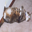

In [51]:
cat_image = cat_model.query(image_test[0:1])
high_cat = cat_image[cat_image['rank'] == 1]
similar_cat = cat.filter_by(high_cat['reference_label'], 'id')
similar_cat['image'][0]

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 1.218ms      |

| Done         |         | 100         | 5.832ms      |

+--------------+---------+-------------+--------------+

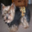

In [52]:
dog_image = dog_model.query(image_test[0:1])
high_dog = dog_image[dog_image['rank'] == 1]
similar_dog = dog.filter_by(high_dog['reference_label'], 'id')
similar_dog['image'][0]

In [53]:
cat_model.query(image_test[0:1])['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 1.19ms       |

| Done         |         | 100         | 6.533ms      |

+--------------+---------+-------------+--------------+

36.15573070978294

In [54]:
dog_model.query(image_test[0:1])['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 1.281ms      |

| Done         |         | 100         | 6.314ms      |

+--------------+---------+-------------+--------------+

37.77071136184157

In [55]:
dog_dog_distances = dog_model.query(image_test, k=1)
dog_cat_distances = cat_model.query(image_test, k=1)
dog_auto_distances = auto_model.query(image_test, k=1)
dog_bird_distances = bird_model.query(image_test, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 24

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 4000         | 88000   | 4.3222      | 341.508ms    |

| Done         | 2036000 | 100         | 383.857ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 24

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 4000         | 84000   | 4.12574     | 320.047ms    |

| Done         | 2036000 | 100         | 361.635ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 24

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 4000         | 84000   | 4.12574     | 305.659ms    |

| Done         | 2036000 | 100         | 344.191ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 24

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 4000         | 80000   | 4.1841      | 300.991ms    |

| Done         | 1912000 | 100         | 362.047ms    |

+--------------+---------+-------------+--------------+

In [56]:
dog_distances = tc.SFrame()
dog_distances['dog-dog'] = dog_dog_distances['distance']
dog_distances['dog-cat'] = dog_cat_distances['distance']
dog_distances['dog-auto'] = dog_auto_distances['distance']
dog_distances['dog-bird'] = dog_bird_distances['distance']

In [57]:
dog_distances

dog-dog,dog-cat,dog-auto,dog-bird
37.464262878423845,34.62371920804243,39.67105827921273,38.07426586900459
42.302582635574396,42.148534598565625,36.87386833116518,42.70762710266656
29.347231958505894,33.868057930239424,43.00890566881215,36.36740241377261
43.138619657492214,39.95084446731843,34.61927102213733,39.92461112445864
33.47735903726335,36.419607706754384,41.95797614571203,41.75386473035126
32.84584956840554,38.83532688735542,46.00213318067788,41.3382958924861
35.03970731890584,36.97634108541546,42.946229069238804,38.615759085289056
50.51123537831657,50.66269947506257,55.22464446743753,51.37195363893463
33.90103276968193,34.575007291446106,41.68660600484793,37.08922699538214
37.484925090925636,34.77882479101661,39.22696649347584,38.27228869398105


In [58]:
dog_distances[0]

{'dog-dog': 37.464262878423845,
 'dog-cat': 34.62371920804243,
 'dog-auto': 39.67105827921273,
 'dog-bird': 38.07426586900459}

In [59]:
def is_dog_correct(row):
    if row['dog-dog'] < row['dog-auto'] and row['dog-dog'] < row['dog-cat'] and row['dog-dog'] < row['dog-bird']:
        return 1
    else:
        return 0

In [60]:
dog_distances.apply(is_dog_correct).sum()

Using default 16 lambda workers.

To maximize the degree of parallelism, add the following code to the beginning of the program:

"turicreate.config.set_runtime_config('TURI_DEFAULT_NUM_PYLAMBDA_WORKERS', 24)"

Note that increasing the degree of parallelism also increases the memory footprint.

1136